Este script abarca del video 1-10

In [4]:
#try:
#    import plaidml.keras
#    plaidml.keras.install_backend()
#    import os
#    os.environ['KERAS_BACKEND']="plaidml.keras.backend"
#finally:
    # first lets import the useful stuff
import tensorflow as tf
import keras

    # import other stuff
from keras import backend as K
import numpy as np

In [5]:
try:
    if tf.test.gpu_device_name():
        print(tf.test.gpu_device_name())
    else:
        print("No GPU")
except:
    print("Corre como siempre")

No GPU


In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

Mi computadora tiene una CPU y GPU amd, por lo tanto tuve que utilizar esta libreria para acceder al GPU
https://rustyonrampage.github.io/deep-learning/2018/10/18/tensorfow-amd.html

Todo lo demas corre normal

In [4]:
%run "preprocessing_data.ipynb" #Obtains the data to work

In [5]:
#checks if an gpu is avilable, i didnt write it

In [6]:
#creating the model
model= Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x=scaled_train_samples,y=train_labels,batch_size=10 ,epochs=30 , shuffle=True, verbose=2)

Train on 2100 samples
Epoch 1/30
2100/2100 - 1s - loss: 0.6631 - accuracy: 0.5605
Epoch 2/30
2100/2100 - 1s - loss: 0.6302 - accuracy: 0.6195
Epoch 3/30
2100/2100 - 1s - loss: 0.6012 - accuracy: 0.6671
Epoch 4/30
2100/2100 - 1s - loss: 0.5685 - accuracy: 0.7419
Epoch 5/30
2100/2100 - 1s - loss: 0.5349 - accuracy: 0.7910
Epoch 6/30
2100/2100 - 1s - loss: 0.4998 - accuracy: 0.8267
Epoch 7/30
2100/2100 - 1s - loss: 0.4631 - accuracy: 0.8486
Epoch 8/30
2100/2100 - 1s - loss: 0.4261 - accuracy: 0.8690
Epoch 9/30
2100/2100 - 1s - loss: 0.3956 - accuracy: 0.8814
Epoch 10/30
2100/2100 - 1s - loss: 0.3698 - accuracy: 0.8943
Epoch 11/30
2100/2100 - 1s - loss: 0.3490 - accuracy: 0.9067
Epoch 12/30
2100/2100 - 1s - loss: 0.3319 - accuracy: 0.9071
Epoch 13/30
2100/2100 - 1s - loss: 0.3184 - accuracy: 0.9152
Epoch 14/30
2100/2100 - 1s - loss: 0.3075 - accuracy: 0.9157
Epoch 15/30
2100/2100 - 1s - loss: 0.2991 - accuracy: 0.9229
Epoch 16/30
2100/2100 - 1s - loss: 0.2925 - accuracy: 0.9257
Epoch 17/30

In [9]:
#Crea modelo con un set de validacion
model.fit(scaled_train_samples, train_labels,validation_split=.10,batch_size=10 ,epochs=30 , shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.2657 - accuracy: 0.9360 - val_loss: 0.2097 - val_accuracy: 0.9381
Epoch 2/30
1890/1890 - 1s - loss: 0.2651 - accuracy: 0.9354 - val_loss: 0.2090 - val_accuracy: 0.9381
Epoch 3/30
1890/1890 - 1s - loss: 0.2645 - accuracy: 0.9360 - val_loss: 0.2085 - val_accuracy: 0.9381
Epoch 4/30
1890/1890 - 1s - loss: 0.2639 - accuracy: 0.9360 - val_loss: 0.2083 - val_accuracy: 0.9381
Epoch 5/30
1890/1890 - 1s - loss: 0.2633 - accuracy: 0.9370 - val_loss: 0.2078 - val_accuracy: 0.9381
Epoch 6/30
1890/1890 - 1s - loss: 0.2627 - accuracy: 0.9360 - val_loss: 0.2073 - val_accuracy: 0.9381
Epoch 7/30
1890/1890 - 1s - loss: 0.2622 - accuracy: 0.9376 - val_loss: 0.2079 - val_accuracy: 0.9381
Epoch 8/30
1890/1890 - 1s - loss: 0.2617 - accuracy: 0.9360 - val_loss: 0.2066 - val_accuracy: 0.9381
Epoch 9/30
1890/1890 - 1s - loss: 0.2612 - accuracy: 0.9360 - val_loss: 0.2062 - val_accuracy: 0.9381
Epoch 10/30
1890/1890 - 1s - loss: 

In [10]:
#Predictions
predictions = model.predict(scaled_test_samples,batch_size=10, verbose=0) #realiza la prediccion
print(predictions.shape)
rounded_predictions = np.argmax(predictions,axis=-1)#redondea las predicciones axis=-1 remueve una columna
print(rounded_predictions.shape)

(420, 2)
(420,)


Confusion matrix without normalization
[[193  17]
 [ 10 200]]


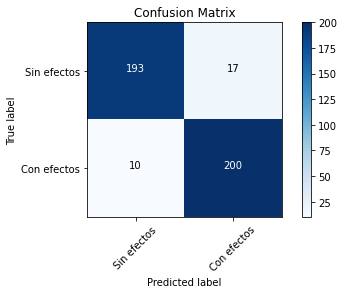

In [11]:
#Ploting the data
%run "confus_matrix.ipynb"
cm_labels=["Sin efectos","Con efectos"]
cm = confusion_matrix(test_labels,rounded_predictions)
plot_confusion_matrix(cm,classes=cm_labels,title='Confusion Matrix')

## Save and load models

### Guardando modelo

In [12]:
#import os.path validations stuffs... I don't care since for this homework I'll save the model anyway
model.save('Modelo_Generado.h5') #Permite seguir entrenando desde el momento en que quedo guardado

### Cargando modelo

In [13]:
from tensorflow.keras.models import load_model
cargado=load_model('Modelo_Generado.h5')
cargado.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
cargado.get_weights() #Muestra los parametros

[array([[ 0.72773063,  0.2856408 ,  0.67716944,  0.36166078,  0.2564493 ,
         -0.12047935, -0.08349289,  0.4848312 , -0.29769185,  0.42039335,
         -0.22819832, -0.3530803 ,  0.34496993, -0.44242054, -0.41365397,
          0.26151374]], dtype=float32),
 array([-0.16024736,  0.1553339 , -0.17919327, -0.1401513 , -0.11460464,
         0.21840583,  0.17937551, -0.1479979 ,  0.        , -0.15224053,
         0.        ,  0.        , -0.1398496 ,  0.        ,  0.        ,
        -0.11730256], dtype=float32),
 array([[-1.79523036e-01,  3.42837781e-01,  2.70521510e-02,
         -1.20691046e-01, -3.90205503e-01,  4.90867525e-01,
          9.62868333e-02,  5.43460250e-01, -4.30247128e-01,
         -5.38698673e-01,  3.87516208e-02, -3.06463480e-01,
          2.02228636e-01, -3.00579190e-01,  8.01074430e-02,
         -3.92341882e-01,  4.31466460e-01,  2.67742425e-01,
          2.06322610e-01,  7.07768500e-02, -1.97305337e-01,
         -9.59733501e-02,  4.78979051e-02,  3.58084626e-02,
 

In [15]:
cargado.optimizer

In [16]:
#Guardando arquitectura
json_string=cargado.to_json() #existe la opcion de guardarlo a formato yaml
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [17]:
#Recontruyendo desde json o yaml
from tensorflow.keras.models import model_from_json
arqui = model_from_json(json_string)
arqui.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [18]:
#guardar los pesos (w)
model.save_weights('pesos_modelo.h5')

para cargar los pesos tenemos que crear una arquitectura igual de la que fue creado
esto se hace con Secuencial([blablabla])<br>
para cargar los pesos se hace lo siguiente<br>
modelo= Secuencial([blablabla])#modelo creado con la misma arquitectura<br>
modelo.load_weights('pesos.h5')

# Convolutional NN

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [8]:
# Organiza la informacion en carpetas
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')#Se evita el overlaping moviendo los archivos, asi no hay repeticion    
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

In [9]:
#Crea las direcciones para acceder a la informacion
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

In [10]:
#Crea los "lotes" de datos
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
#Confirma que todo se ejecuto correctamente
assert train_batches.n==1000
assert valid_batches.n==200
assert test_batches.n==100

In [12]:
imgs,labels=next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

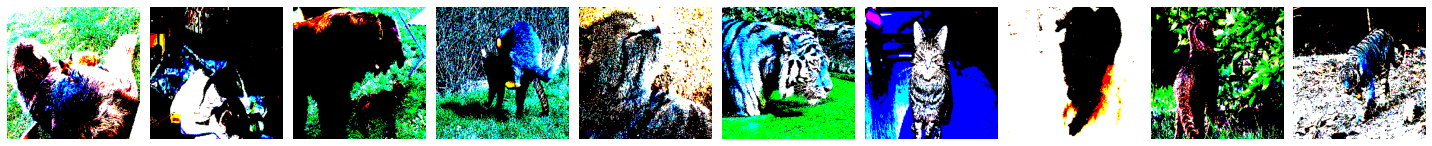

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

https://deeplizard.com/learn/video/LhEMXbjGV_4